In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette('cubehelix')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [5, 3.5]
plt.rcParams['figure.dpi'] = 150

In [ ]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
!pip install pyfolio
import pyfolio as pf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 723 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91 kB 9.2 MB/s 
     |████████████████████████████████| 52 kB 1.7 MB/s 
     |████████████████████████████████| 1.6 MB 63.9 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88681 sha256=7b58a72ebd35ffcca284acfd171c2cc56969547455a7afd847cfe9afc4847389
  Stored in directory: /root/.cache/pip/wheels/42/16/92/9c9d49efccc497040268960f0825101cc9b1c6e41cdc5a409e
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39778 sha256=54b757a93c9ddd9c7a09ac8ffc67660531f210a03299630ff65c21ffcf56f8f

/usr/local/lib/python3.8/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
returns = prices_df['Adj Close'].pct_change().dropna()

In [ ]:
portfolio_weights = n_assets * [1/n_assets]

In [ ]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), 
                              index=returns.index)

In [ ]:
N_PORTFOLIOS = 10 ** 5 
N_DAYS = 252 
RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT', 'TWTR']
RISKY_ASSETS.sort()
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'

n_assets = len(RISKY_ASSETS)

In [ ]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, 
                        end=END_DATE, adjusted=True)
print(f'Downloaded {prices_df.shape[0]} rows of data.')


[*********************100%***********************]  4 of 4 completed
Downloaded 250 rows of data.


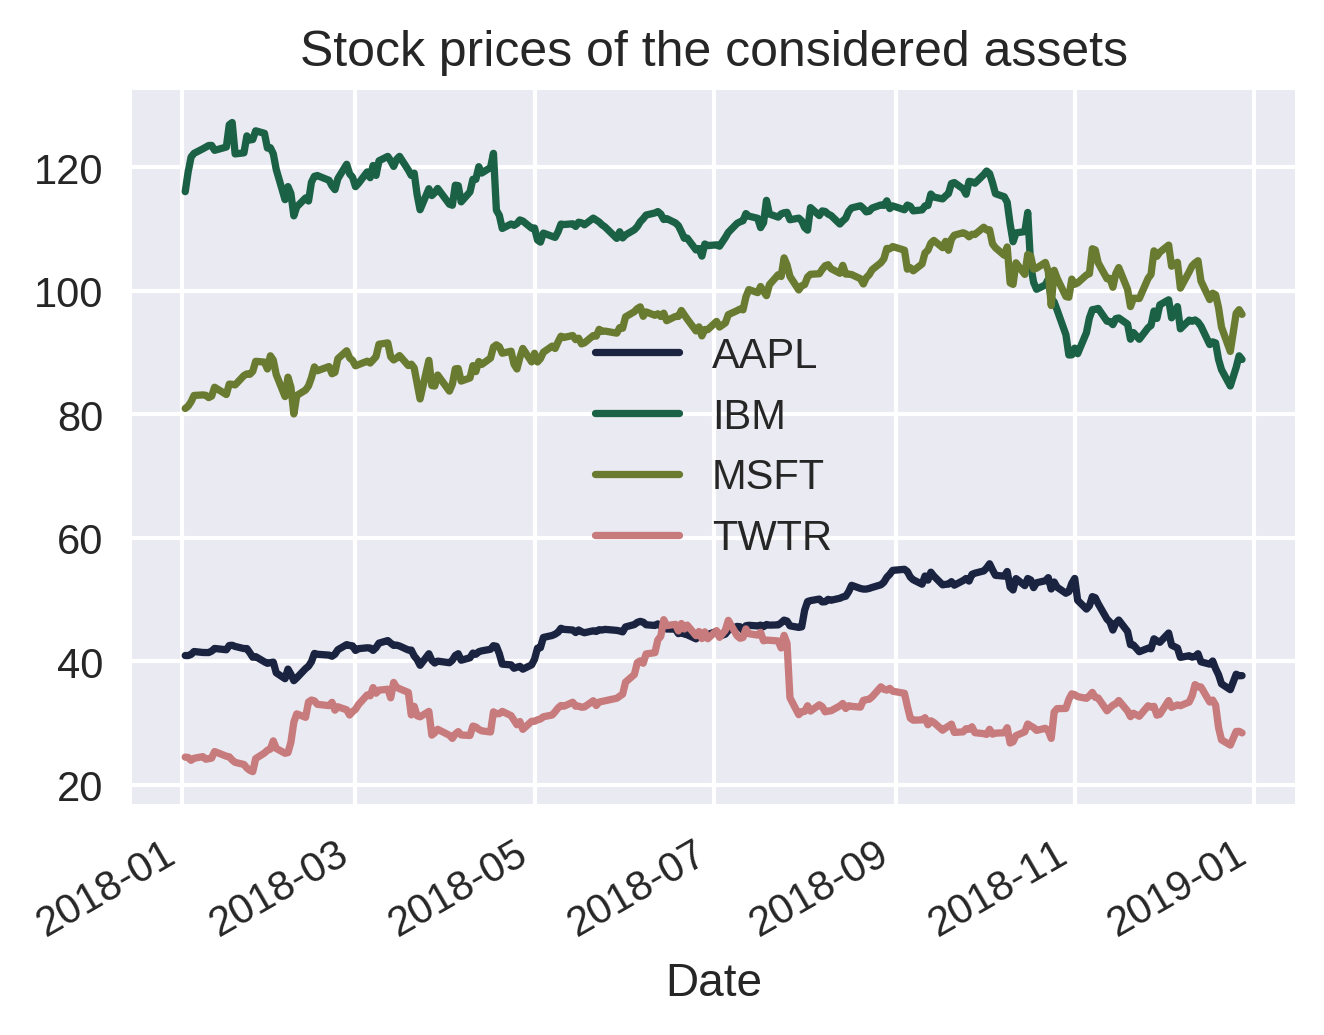

In [ ]:
prices_df['Adj Close'].plot(title='Stock prices of the considered assets')

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

In [ ]:
N_PORTFOLIOS = 10 ** 5 
N_DAYS = 252 
RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT', 'TWTR']
RISKY_ASSETS.sort()
START_DATE = '2018-01-01'
END_DATE = '2018-12-31'

n_assets = len(RISKY_ASSETS)

In [ ]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE, 
                        end=END_DATE, adjusted=True)
print(f'Downloaded {prices_df.shape[0]} rows of data.')

[*********************100%***********************]  4 of 4 completed
Downloaded 250 rows of data.


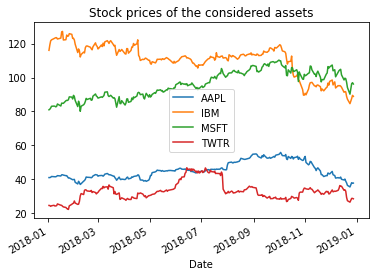

In [ ]:
prices_df['Adj Close'].plot(title='Stock prices of the considered assets')

In [ ]:
returns_df = prices_df['Adj Close'].pct_change().dropna()

avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

In [ ]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
# Return random floats in the half-open interval [0.0, 1.0) 
# Results are from the "continuous uniform" distribution over the stated interval.

weights /= np.sum(weights, axis=1)[:,np.newaxis]
# /= is equivalent to x = x/3 

In [ ]:
  portf_rtns = np.dot(weights,avg_returns)

  portf_vol = []
  for i in range(0, len(weights)): 
      portf_vol.append(np.sqrt(np.dot(weights[i].T, 
                                      np.dot(cov_mat, weights[i]))))
  

  portf_vol = np.array(portf_vol) 
  portf_sharpe_ratio = portf_rtns / portf_vol 
  
# Sharpe ratio = (mu - r_f) / (volatility) = ([w1,...,w4]*[r_1, ..., r_4]' - risk free rate) / sqrt( [(w1),(w2),... (w4)]*VAR-COV* [(w1),(w2),...,(w4)]')

In [ ]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 
                                 'volatility': portf_vol, 
                                 'sharpe_ratio': portf_sharpe_ratio})

portf_results_df 

,returns,volatility,sharpe_ratio
0,0.039644,0.260878,0.151965
1,0.198528,0.438190,0.453063
2,0.052047,0.317961,0.163689
3,0.008193,0.260118,0.031497
4,0.030560,0.253088,0.120749
...,...,...,...
99995,-0.021652,0.234646,-0.092275
99996,0.156017,0.360950,0.432241
99997,-0.002922,0.234765,-0.012447
99998,0.107904,0.290124,0.371923


In [ ]:
N_POINTS = 100 
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), 
                            N_POINTS)

portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS): 
    if portf_rtns_ef[point_index] not in portf_rtns: 
         indices_to_skip.append(point_index) 
         continue 
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index]) 
    # return elements chosen from x or y depending on condition
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))

portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

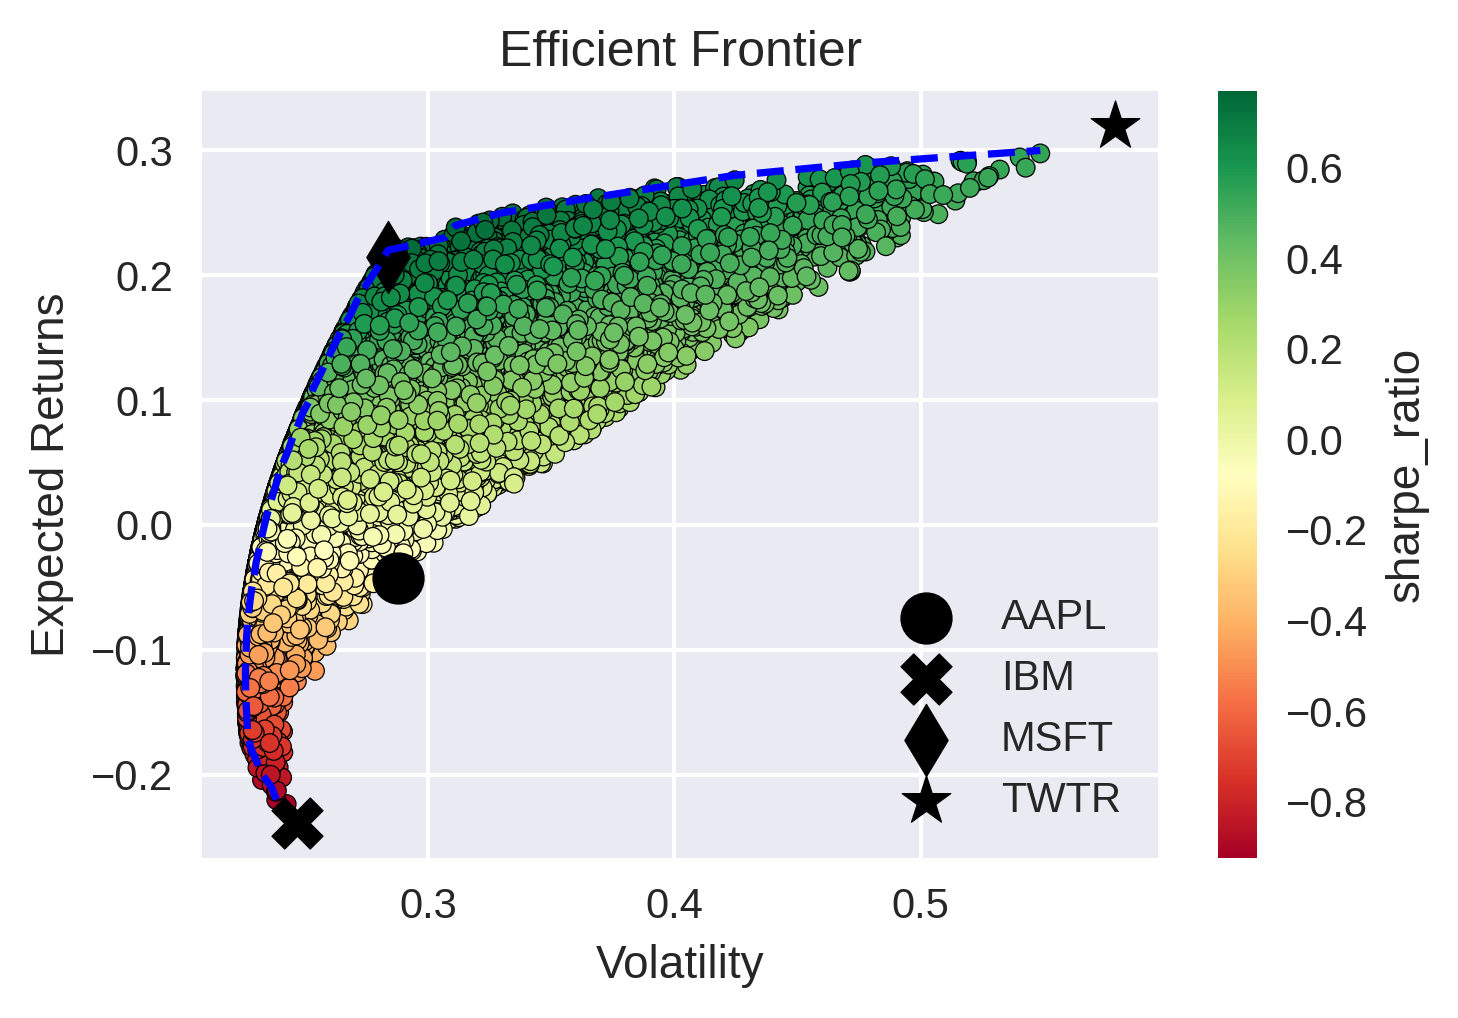

In [ ]:
MARKS = ['o', 'X', 'd', '*']

fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                y=avg_returns[asset_index], 
                marker=MARKS[asset_index], 
                s=150, 
                color='black',
                label=RISKY_ASSETS[asset_index])
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
#np.argmax: returns the indices of the maximum values along an axis 

max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]
# Access a group of rows and columns by label(s) or a boolean array. 

min_vol_ind = np.argmin(portf_results_df.volatility)

min_vol_portf = portf_results_df.loc[min_vol_ind]

In [ ]:
print('Maximum Sharpe Ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
returns: 21.81% volatility: 28.37% sharpe_ratio: 76.90% 
Weights
AAPL: 0.87% IBM: 0.07% MSFT: 93.28% TWTR: 5.79% 

In [ ]:
print('Minimum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(RISKY_ASSETS, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Minimum Volatility portfolio ----
Performance
returns: -12.00% volatility: 22.58% sharpe_ratio: -53.14% 
Weights
AAPL: 28.59% IBM: 57.85% MSFT: 12.29% TWTR: 1.27% 